# Example for an analytical solution of weakly scattering sphere in Python

In this example the analytical solution for a weakly scattering sphere is based on Anderson, V. C., "Sound scattering from a fluid sphere", 
 J. Acoust. Soc. America, 22 (4), pp 426-431, July 1950 is computed.
 
Several variable need to be defined to compute the target strength (TS):
- Define the sphere
    - radius (Radius) in m
    - range (Range) which is the distance from the sound emitting device to the center of the sphere (m)
    - density of the sphere (Rho_b) (kg/$m^3$)
    - sound velocity inside the sphere (c_b) (m/s)
- Define the surrounding fluid
    - sound velocity in the surrounding fluid (c_w)(m/s)
    - density of the surrounding fluid (kg/$m^3$)
- Define the plane wave 
    - Frequency (f) (Hz)
    - Scattering angle relative to the travelling direction of the incident wave (rad)
    
Example for a 10 cm sphere with a density and sound velcoity contrast of 1.0025, at a range of 10 m, well outside of the nearfield at a frequency of 200 kHz with an assumed sound velocity of 1500 m/s and a density of 1026 kg/m^3 for the surrounding fluid, measured at 90 degrees (i.e. 1.571 rad):

In [22]:
from fluid_sphere import *
#Define variables
c_w = 1500 
f = 200000
c_b = 1.0025*1500
Range = 10
Radius = 0.1
Rho_w = 1026
Rho_b = 1.0025 * Rho_w
Theta = 1.571
#get TS
TS = fluid_sphere(f=f,Radius=Radius, Range=Range,Rho_w=Rho_w,Rho_b=Rho_b,Theta=Theta,c_w=c_w,c_b=c_b)
print("TS for the sphere is %.2f dB"%TS)

TS for the sphere is -73.99 dB


TS can easily becomputed for a range of frequencies, here from 1 to 300 kHz at 0.5 kHz steps:

In [31]:
freqs = np.arange(1,300,0.5)*1000
TS = [fluid_sphere(f=x,Radius=Radius, Range=Range,Rho_w=Rho_w,Rho_b=Rho_b,Theta=Theta,c_w=c_w,c_b=c_b) for x in freqs]

Plot the results:

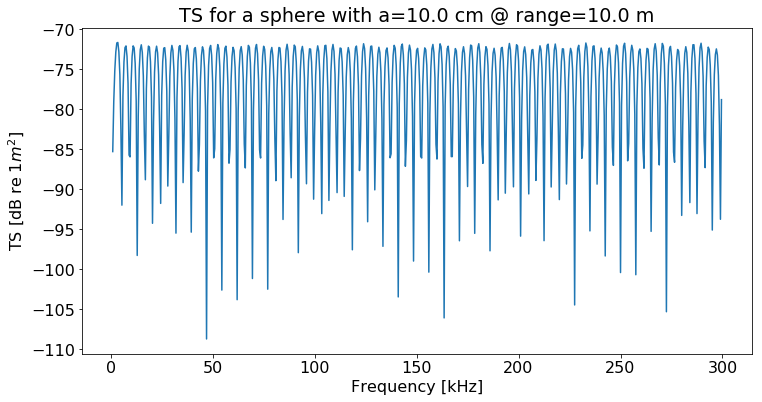

In [40]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(freqs/1000, TS)
plt.xlabel("Frequency [kHz]")
plt.ylabel("TS [dB re 1$m^2$]")
plt.title("TS for a sphere with a=%.1f cm @ range=%.1f m"%(Radius*100,Range))
plt.show()